### Part A

In [4]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [5]:
# importing all the necessary libaries for use
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split

# importing all the classifiers and metrics that'll be experimented with
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [6]:
Energy = pd.read_csv('/content/CE802_P3_Data.csv')
Energy

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,5602.44,830.44,-206.39,155.40,-17610.98,Rest,1756.56,1287.64,-47.26,Very low,...,-357.36,570.36,2.92,1347.88,166.24,-110.19,63.56,-319.32,38.34,-42.05
1,3692.22,1052.24,-217.92,5.22,-20193.62,USA,2246.56,2695.66,-65.96,High,...,-356.24,506.16,6.24,805.26,171.70,-89.94,73.25,-251.67,53.37,396.38
2,3939.39,853.77,-209.88,2.61,-15247.10,USA,2464.97,1975.96,-60.66,Medium,...,-382.04,948.96,5.97,1127.04,366.06,-31.29,76.42,-167.73,56.94,-13.75
3,4727.82,754.45,-318.92,39.30,-11792.16,USA,1229.09,2007.94,-39.16,Low,...,-470.98,571.41,0.79,-297.04,137.04,-36.66,26.70,-120.30,54.84,3668.71
4,2649.75,735.06,-264.47,1.32,-24217.70,Rest,2294.62,1639.02,-65.66,Very low,...,-334.52,613.50,-0.37,1333.86,214.12,-150.15,101.78,-317.40,68.01,-151.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5365.59,755.72,-227.47,2.43,-14734.74,Europe,2013.40,1266.16,-50.08,Medium,...,-267.26,816.18,1.40,515.88,226.78,-318.15,34.51,-270.33,52.35,2535.19
1496,5928.99,1028.52,-212.01,146.73,-21216.96,Europe,1795.27,960.66,-55.34,Very high,...,-411.16,545.52,0.40,1280.96,209.82,-126.33,114.22,-209.85,68.55,2738.03
1497,4204.50,1191.44,-253.51,121.14,-16907.42,USA,3174.30,880.56,-41.56,Very high,...,-644.46,645.84,0.22,-109.40,168.08,-218.64,80.06,-213.39,47.70,3818.24
1498,4822.50,302.15,-185.43,7.08,-12444.10,Rest,2024.18,1098.70,-47.50,Very low,...,-349.58,622.80,3.29,356.30,274.26,-255.84,66.37,-200.91,56.28,595.52


In [7]:
#checking for any missing values in the data 
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   object 
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   int64  
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   int64  
 21  F22     1500 non-null   float64
 22  

In [8]:
#Since there are no missing values, the columns with object types(string) will be manipulated  to enable scaling normalization and model fitting
Energy['F6'].replace({"USA": 1, "Europe": 2,  "UK": 3, "Rest": 4, }, inplace=True)
Energy['F10'].replace({"Very low": 1, "Low": 2, "Medium": 3, "High": 4, "Very high": 5} , inplace=True)

In [9]:
#confirming the data types of all the columns
Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   int64  
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   int64  
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   int64  
 21  F22     1500 non-null   float64
 22  

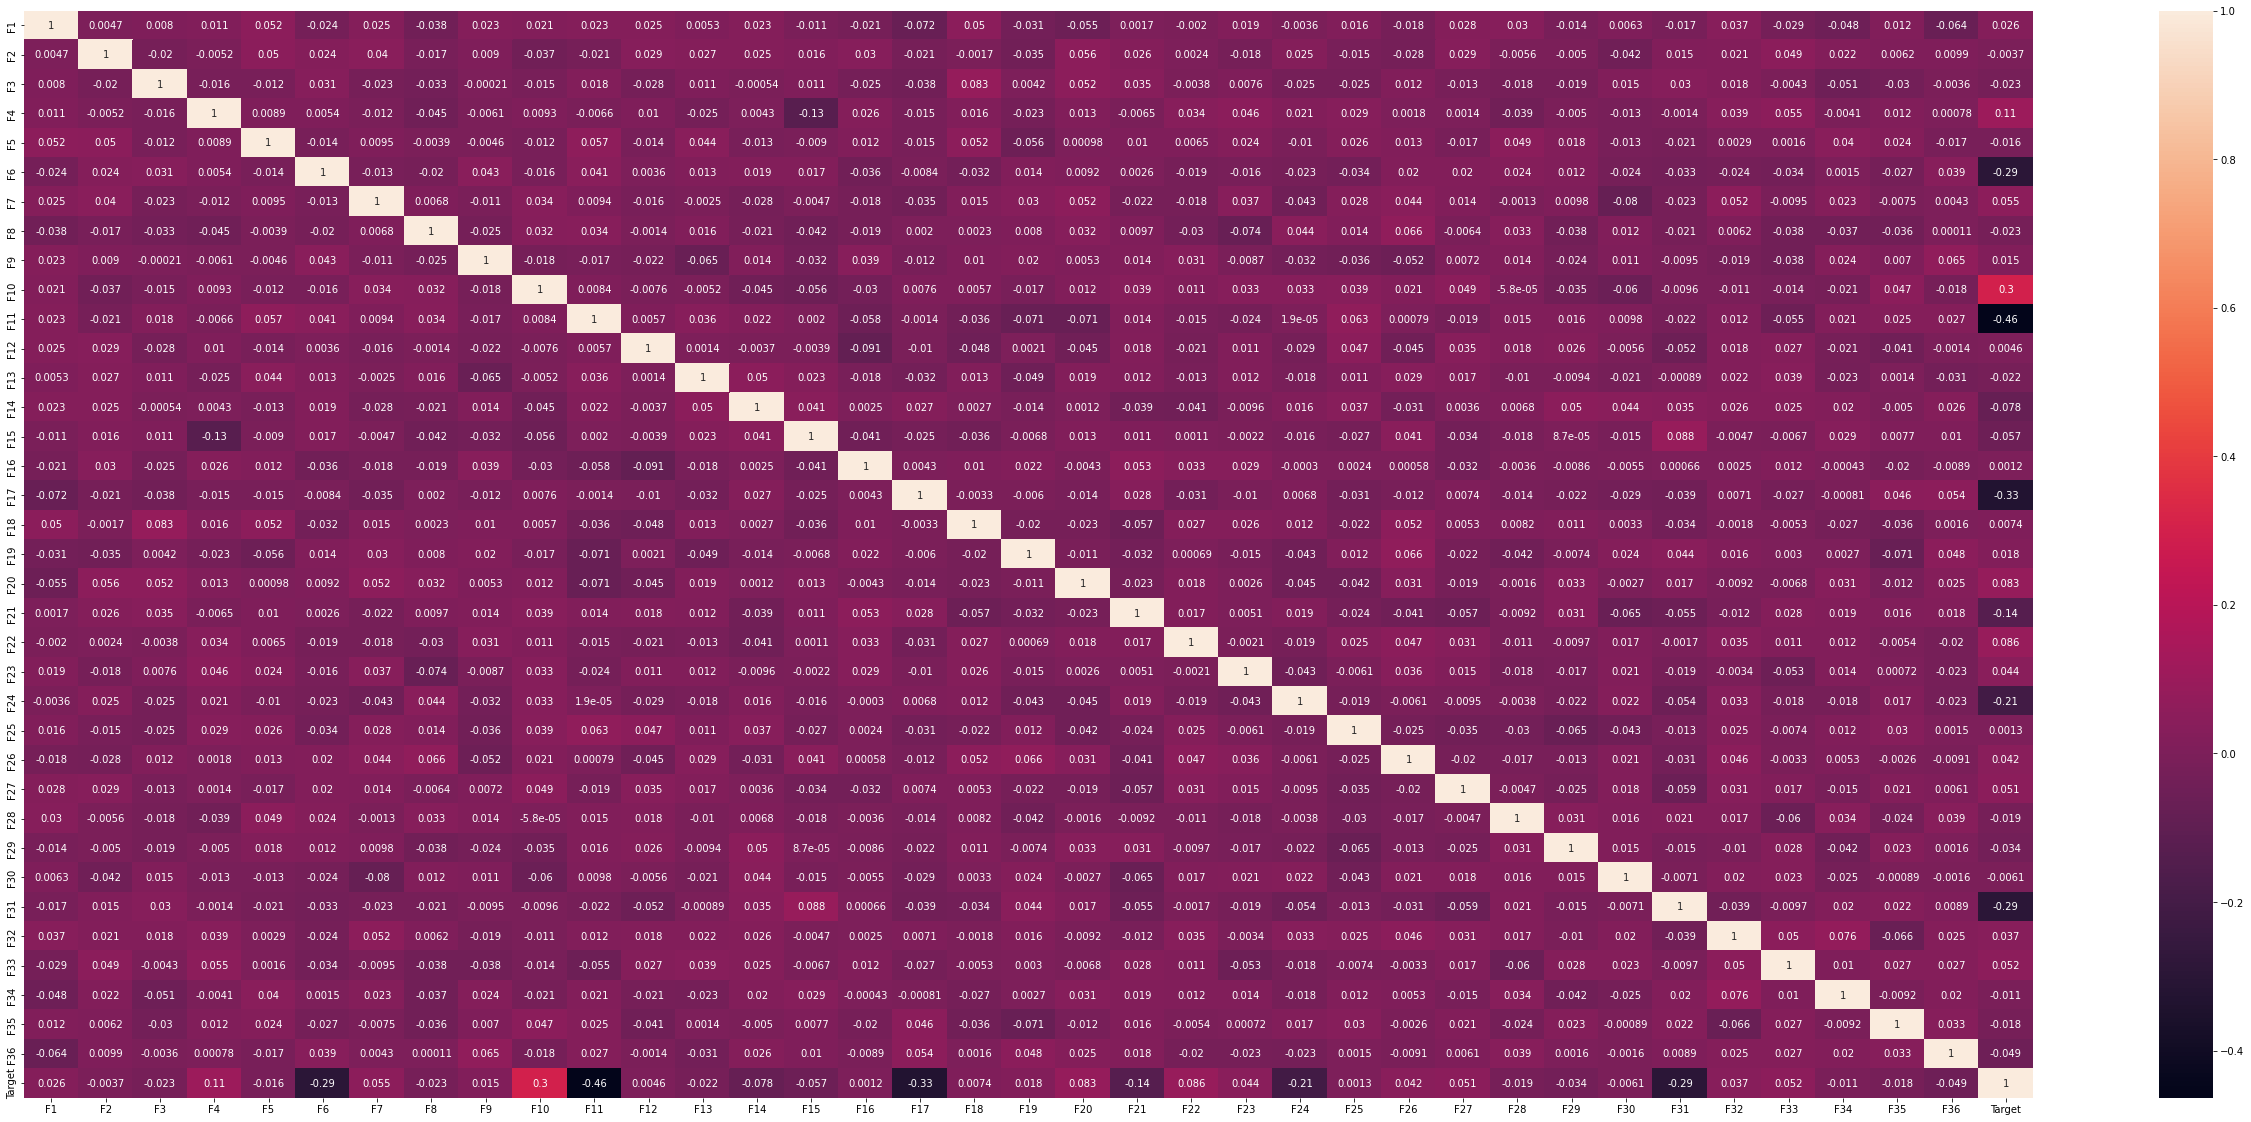

In [10]:
# Picturing the correlation
plt.figure(figsize=(45,20))
sns.heatmap(Energy.corr(),annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


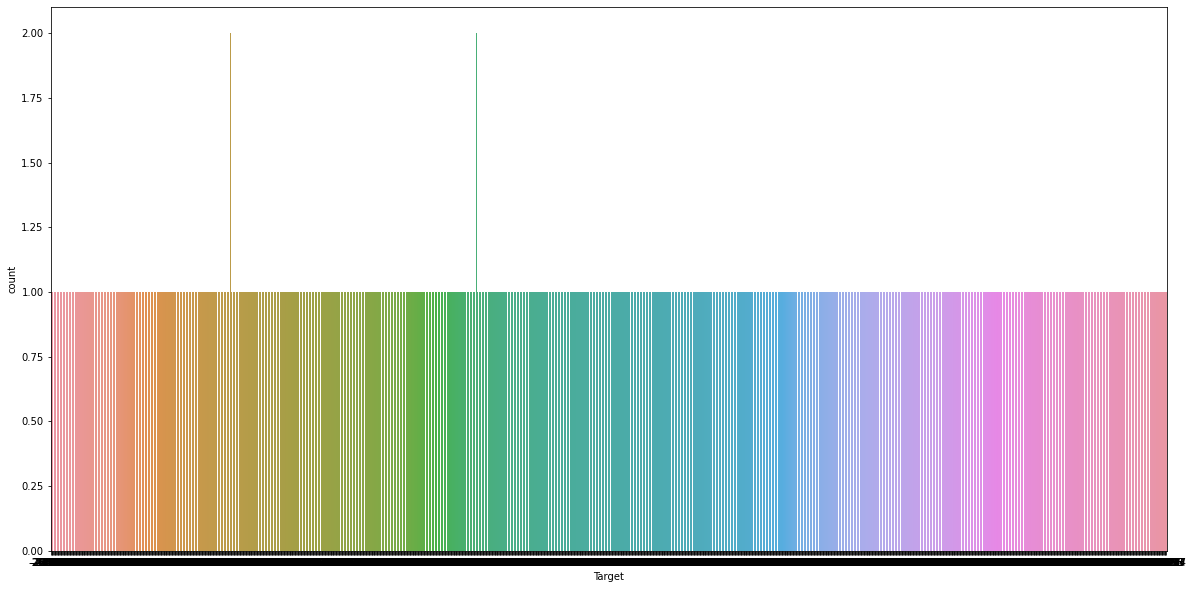

In [11]:
# showing the distribution of the target data
plt.figure(figsize=(20,10))
sns.countplot(Energy['Target'])

Text(0, 0.5, 'Frequency')

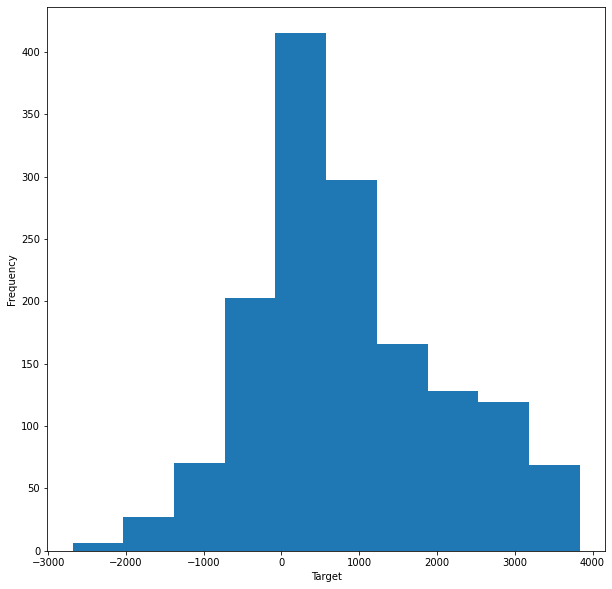

In [12]:
plt.figure(figsize=(10,10))
plt.hist(Energy['Target'])
plt.xlabel('Target')
plt.ylabel('Frequency')


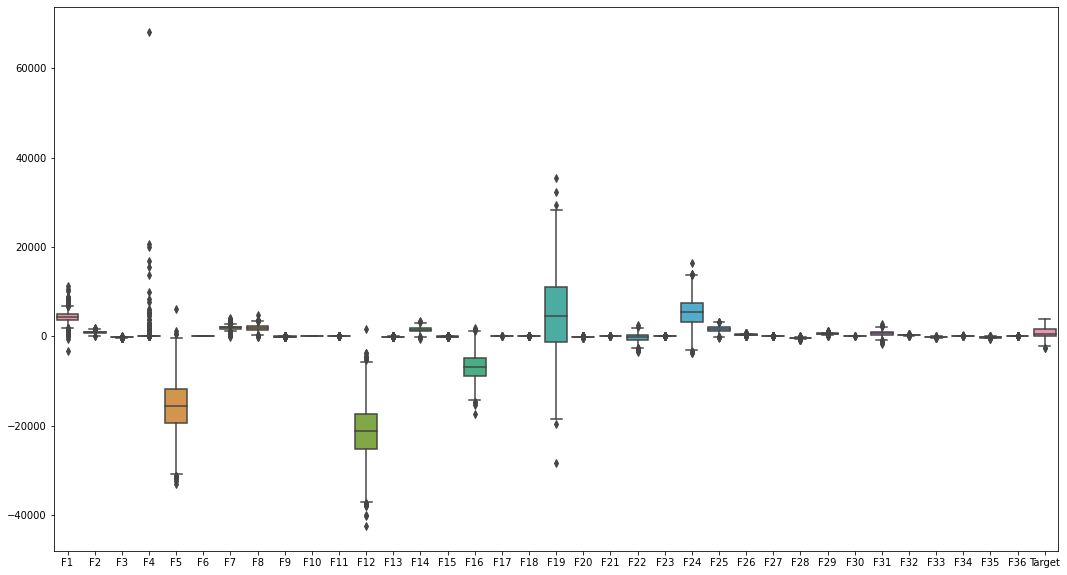

In [13]:
# visualizing the outliers
plt.figure(figsize=(18,10))
sns.boxplot(data=Energy)
plt.show()

In [14]:
# normalizing the train data to be within the range of (0.0 to 1.0) to reduce the outliers using min-max scaler formula =(x-min(x))/(max(x)-min(x))
Energyy= ((Energy-Energy.min()) / (Energy.max() -Energy.min()))
# checking if data has been normalized
(Energyy.min(), Energyy.max())
Energyy

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,0.613344,0.437976,0.594724,0.002281,0.393508,1.000000,0.429361,0.295497,0.551054,0.00,...,0.577559,0.469630,0.5775,0.702394,0.334132,0.546273,0.428241,0.357025,0.371563,0.405355
1,0.481977,0.560993,0.570812,0.000077,0.327764,0.000000,0.544017,0.585775,0.355815,0.75,...,0.578764,0.416899,0.7435,0.582112,0.347220,0.581828,0.475002,0.466353,0.510691,0.472574
2,0.498975,0.450915,0.587486,0.000038,0.453684,0.000000,0.595124,0.437402,0.411151,0.50,...,0.551014,0.780598,0.7300,0.653441,0.813087,0.684804,0.490300,0.602007,0.543738,0.409694
3,0.553196,0.395829,0.361351,0.000577,0.541633,0.000000,0.305938,0.443995,0.635623,0.25,...,0.455353,0.470493,0.4710,0.337768,0.264142,0.675375,0.250362,0.678658,0.524299,0.974284
4,0.410285,0.385075,0.474274,0.000019,0.225326,1.000000,0.555263,0.367938,0.358948,0.00,...,0.602125,0.505064,0.4130,0.699286,0.448897,0.476113,0.612682,0.360128,0.646209,0.388500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.597056,0.396534,0.551007,0.000036,0.466726,0.333333,0.489460,0.291069,0.521612,0.50,...,0.674468,0.671537,0.5015,0.517966,0.479243,0.181143,0.288051,0.436197,0.501250,0.800494
1496,0.635801,0.547837,0.583069,0.002154,0.301713,0.333333,0.438419,0.228087,0.466695,1.00,...,0.519694,0.449228,0.4515,0.687560,0.438591,0.517935,0.672715,0.533938,0.651208,0.831593
1497,0.517206,0.638197,0.497003,0.001778,0.411418,0.000000,0.761101,0.211574,0.610566,1.00,...,0.268763,0.531627,0.4425,0.379362,0.338543,0.355860,0.507866,0.528217,0.458206,0.997210
1498,0.559707,0.144969,0.638192,0.000104,0.525037,1.000000,0.491982,0.256546,0.548549,0.00,...,0.585927,0.512702,0.5960,0.482592,0.593049,0.290545,0.441801,0.548386,0.537628,0.503106


In [15]:
# Identifying X as the input columns and Y as the resulting output
X = Energyy.drop('Target', axis=1)
Y = Energyy['Target']

# Spliting the data into a training and test sets with a 20% ratio for the test size using the train_test_split function 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



Fitting the Model

In [28]:
# Calling out the Linear Regression Model
Model1 = LinearRegression()

# Fit the model to the data
Model1.fit(x_train, y_train)
y_pred = Model1.predict(x_test)
accuracy = Model1.score(x_train, y_train)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(accuracy)
print(r2)


0.010422722416831828
0.6990951275065231
0.6839404459123757


In [27]:
# Calling out the Support Vector Regression Model
Model2 = SVR()

# Fit the model to the data
Model2.fit(x_train, y_train)
y_pred = Model2.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print(mse)
print(accuracy)
print(r2)

0.010070982163698464
0.6990951275065231
0.6946066483798297


In [26]:
# Calling out the Random Forest Regression Model
Model3 = RandomForestRegressor()

# Fit the model to the data
Model3.fit(x_train, y_train)
y_pred = Model3.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(accuracy)
print(r2)


0.010605112177671978
0.6990951275065231
0.6784096427137611


### Part B

In [19]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')
test_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,3348.96,1202.75,-221.51,3.12,-6187.46,UK,1976.25,1570.24,-51.54,Very low,...,-352.28,569.97,3.77,876.16,246.24,-159.93,94.84,-308.16,61.86,NaN
1,4006.65,963.08,-271.74,102.93,-10259.60,USA,1853.07,1627.24,-54.80,High,...,-437.50,840.09,-1.96,481.80,149.28,-0.66,134.67,-319.89,57.54,NaN
2,6005.97,675.87,-204.12,2.34,-7642.14,Europe,1829.49,1951.02,-36.56,Low,...,-390.18,686.01,2.72,165.54,189.76,-195.30,121.35,-122.31,49.08,NaN
3,5121.42,1144.81,-243.28,2.01,-19986.82,USA,2421.77,2136.62,-51.14,Low,...,-352.76,611.04,2.16,1569.80,327.20,-247.38,62.93,-304.17,59.61,NaN
4,3056.22,457.93,-205.14,2.85,-12462.38,Europe,2114.11,1954.16,-40.54,Very low,...,-436.16,618.15,4.92,452.36,220.74,-124.53,72.31,-360.87,53.97,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4755.84,793.02,-271.99,80.79,-23523.30,Europe,1161.88,2336.94,-39.42,Very low,...,-385.84,477.60,0.30,266.84,303.60,-261.81,144.10,-243.69,51.24,NaN
1496,2284.02,574.07,-198.43,19.32,-18526.60,USA,2342.72,2922.12,-49.62,Medium,...,-383.38,598.08,2.83,1020.00,216.32,-178.77,37.13,-324.21,58.62,NaN
1497,5255.28,421.12,-272.72,117.06,-20481.46,Rest,1571.23,1456.02,-50.28,Very low,...,-370.46,390.81,-1.04,734.44,173.84,-224.97,81.68,-294.06,52.29,NaN
1498,1423.44,1308.27,-239.17,1.14,-13342.82,USA,2029.03,1679.62,-47.16,Low,...,-315.00,603.99,6.78,233.02,301.20,-92.31,134.07,-245.73,53.61,NaN


In [20]:
#Carrying out the same manipulation as in the training data due to the presence of the string variables
test_df['F6'].replace({"USA": 1, "Europe": 2,  "UK": 3, "Rest": 4, }, inplace=True)
test_df['F10'].replace({"Very low": 1, "Low": 2, "Medium": 3, "High": 4, "Very high": 5} , inplace=True)

In [21]:
# seperating the input  columns from the target columns and creating a copy
test_data = test_df.iloc[:,:-1].copy()

In [22]:
# Predicting possible new values
predicted = Model3.predict(test_data)
pd.DataFrame(predicted)


,0
0,0.411160
1,0.371687
2,0.405869
3,0.381184
4,0.394385
...,...
1495,0.369133
1496,0.387488
1497,0.371687
1498,0.398401


In [23]:
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted
predicted

array([0.41116045, 0.37168658, 0.40586939, ..., 0.37168658, 0.3984011 ,
       0.38748778])

In [24]:
# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

In [25]:
# IMPORTANT!! Making sure only the last column has changed
assert test_df.iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])